In [1]:
%run header

In [2]:
# read results
import pandas as pd
df1 = pd.read_csv("data/physics-survey.csv")
wedgeprops = {'linewidth' : .7 , 'edgecolor' : 'black'}
fontsize = 12
bar_width = 0.5
opacity = 0.6

In [3]:
print "Sample size "+str(len(df1))

Sample size 38


## Question: How often do you reproduce datasets in your analysis?

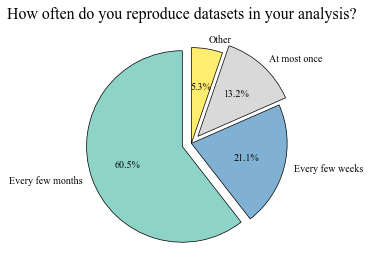

In [4]:
colors = plt.cm.Set3(np.linspace(0,1,4))
explode = (0.1, 0, 0)
explode1 = (0.1, 0, 0.1, 0)

a = df1.loc[df1['Student'] == 'Yes'][df1.columns[7]].value_counts()
b = df1.loc[df1['Student'] == 'No'][df1.columns[7]].value_counts()
t = df1[df1.columns[7]].value_counts()

f, ax3 = plt.subplots()
f.suptitle("How often do you reproduce datasets in your analysis?", fontsize=16)
ax3.pie(tuple(t), explode=explode1, labels=tuple(t.index), autopct='%1.1f%%', 
        shadow=False, startangle=90, colors=colors, wedgeprops=wedgeprops)

#ax3.set_title("All", fontsize=14)

ax3.axis('equal') 

plt.show()
f.savefig('how_often_reproduce.pdf', dpi=100)

# Question: Do you have a code repository for your analysis?

In [5]:
a = df1.loc[df1['Student'] == 'Yes'][df1.columns[6]].value_counts()
b = df1.loc[df1['Student'] == 'No'][df1.columns[6]].value_counts()
t = df1[df1.columns[6]].value_counts()

# merge git users
t['Yes, on git']=t['Yes, on gitlab']+t['Yes, on github']
t = t[2:]
t

No              3
Yes, on SVN     3
Yes, on git    32
Name: Do you have a code repository for your analysis?, dtype: int64

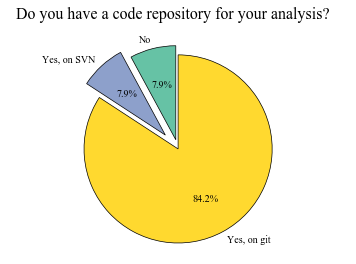

In [6]:
colors = plt.cm.Set2(np.linspace(0,1,4))
explode = (0.1, 0, 0)
explode1 = (0.1, 0.2, 0)

f, ax3 = plt.subplots()
f.suptitle("Do you have a code repository for your analysis?", fontsize=16)
ax3.pie(tuple(t), explode=explode1, labels=tuple(t.index), autopct='%1.1f%%', 
        shadow=False, startangle=90, colors=colors, wedgeprops=wedgeprops)

ax3.axis('equal') 

plt.show()
f.savefig('analysis_repo.pdf', dpi=100)

# Question: Do you have access to your colleagues' code?

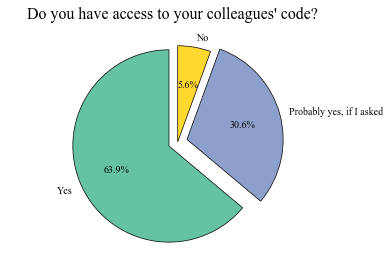

In [7]:
explode = (0.1, 0.1, 0)

t = df1[df1.columns[5]].value_counts()
f, ax3 = plt.subplots()
f.suptitle("Do you have access to your colleagues' code?", fontsize=16)
ax3.pie(tuple(t), explode=explode, labels=tuple(t.index), autopct='%1.1f%%', 
        shadow=False, startangle=90, colors=colors, wedgeprops=wedgeprops)

ax3.axis('equal') 
plt.show()
f.savefig('code_access.pdf', dpi=100)

# Survey question: How familiar are you with ___ ?

In [8]:
# replace some values to fit the screen

df1 = df1.replace('Used it once or twice', 'Used it once or\ntwice')
df1 = df1.replace('Customizing it for my purpose', 'Customizing it\nfor my purpose')

options = ['Never used', 'Used it once or\ntwice', 'Using it regularly', 'Customizing it\nfor my purpose']
mapping = {opt: i for i, opt in enumerate(options)}
key = df1[df1.columns[1]].map(mapping)
df1.iloc[key.argsort()]

l = list()
l.append(df1[df1.columns[1]].value_counts()) # docker
l.append(df1[df1.columns[2]].value_counts()) # cont int
l.append(df1[df1.columns[3]].value_counts()) # pipeline sys
l.append(df1[df1.columns[4]].value_counts()) # open stack

# some wild result tuning
for le in l:
    if 'Using it regularly' not in le.index:
        le['Using it regularly'] = 0
    if 'Customizing it\nfor my purpose' not in le.index:
        le['Customizing it\nfor my purpose'] = 0
    if 'Never used' not in le.index:
        le['Never used'] = 0
    if 'Used it once or\ntwice' not in le.index:
        le['Used it once or\ntwice'] = 0

In [9]:
# sorting
custom_sort = {'Never used':0, 'Used it once or\ntwice':1, 'Using it regularly':2, 'Customizing it\nfor my purpose':3}  
nl = list()
for idf in l:
    idf = idf.to_frame()
    idf['inx'] = idf.index
    idf['sorti'] = idf['inx'].map(custom_sort)
    idf = idf.sort_values(by=['sorti'])
    nl.append(idf)
del l

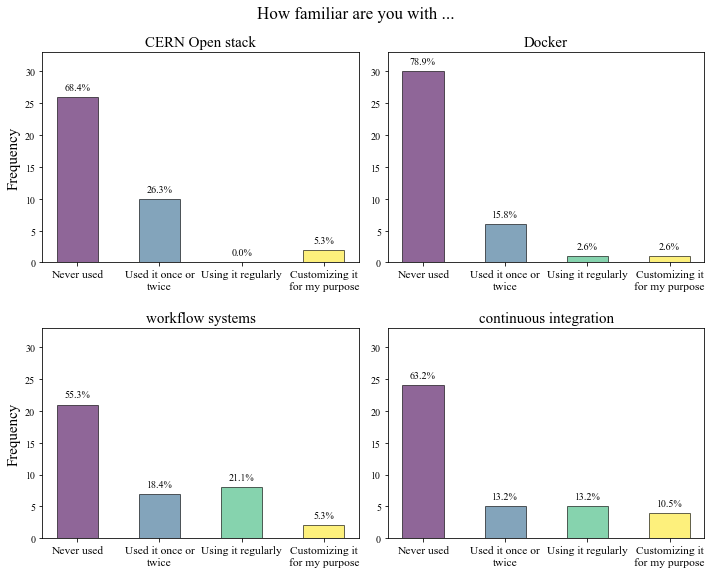

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle("How familiar are you with ...", fontsize=17)
n_groups = 4
y_pos = [1,2,3,4]
bar_width = 0.5
opacity = 0.6
fontsize = 15
col = plt.cm.viridis(np.linspace(0,1,4))

# first box, open stack
ax1.bar(y_pos, tuple(nl[3][nl[3].columns[0]]), bar_width, alpha=opacity, align='center', 
        color=col, edgecolor='k', linewidth=1)
ax1.set_ylabel('Frequency', fontsize=fontsize)
ax1.set_title('CERN Open stack', fontsize=fontsize)
ax1.set_xticks(y_pos)
ax1.set_xticklabels(tuple(nl[3][nl[3].columns[1]]), fontsize=11.5)

# second
ax2.set_title("Docker", fontsize=fontsize)
ax2.bar(y_pos, tuple(nl[0][nl[0].columns[0]]), bar_width, alpha=opacity, align='center', 
        color=col, edgecolor='k', linewidth=1)
ax2.set_xticks(y_pos)
#ax2.set_ylabel('Frequency', fontsize=fontsize)
ax2.set_xticklabels(tuple(nl[0][nl[0].columns[1]]), fontsize=11.5)

# third
from matplotlib.ticker import MaxNLocator
ax3.set_ylabel('Frequency', fontsize=fontsize)
ax3.set_title("workflow systems", fontsize=fontsize)
ax3.bar(y_pos, tuple(nl[2][nl[2].columns[0]]), bar_width, alpha=opacity, align='center', 
        color=col, edgecolor='k', linewidth=1)
ax3.set_xticks(y_pos)
ax3.set_xticklabels(tuple(nl[2][nl[2].columns[1]]), fontsize=11.5)
#ax3.yaxis.set_major_locator(MaxNLocator(integer=True))

# forth
ax4.set_title("continuous integration", fontsize=fontsize)
#ax4.set_ylabel('Frequency', fontsize=fontsize)
ax4.bar(y_pos, tuple(nl[1][nl[1].columns[0]]), bar_width, alpha=opacity, align='center',
        color=col, edgecolor='k', linewidth=1)
ax4.set_xticks(y_pos)
ax4.set_xticklabels(tuple(nl[1][nl[1].columns[1]]), fontsize=11.5)

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.5)
fig.subplots_adjust(top=0.9)

# make easier to compare
ax1.set_ylim([0,33])
ax2.set_ylim([0,33])
ax3.set_ylim([0,33])
ax4.set_ylim([0,33])

# see percentages above bars
for p in ax1.patches:
    proc = p.get_height()*100.0/38.0
    ax1.annotate("%.1f" % proc+"%", (p.get_x() + p.get_width() / 2., p.get_height()), \
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for p in ax2.patches:
    proc = p.get_height()*100.0/38.0
    ax2.annotate("%.1f" % proc+"%", (p.get_x() + p.get_width() / 2., p.get_height()), \
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for p in ax3.patches:
    proc = p.get_height()*100.0/38.0
    ax3.annotate("%.1f" % proc+"%", (p.get_x() + p.get_width() / 2., p.get_height()), \
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for p in ax4.patches:
    proc = p.get_height()*100.0/38.0
    ax4.annotate("%.1f" % proc+"%", (p.get_x() + p.get_width() / 2., p.get_height()), \
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

fig.savefig('familiar_tool.pdf', dpi=100)

# Question: What software do you use in your analysis?

In [11]:
dr = df1[df1.columns[8]].str.split(";")

slist =[]
for x in dr:
    slist.extend(x)
    
df = pd.DataFrame(slist, columns=['response'])
vc = df['response'].value_counts()
df2 = vc.to_frame()

df_1 = pd.DataFrame(df2[0:3])
df_1 = df_1.append(df2[7:8])
df2

df_2 = pd.DataFrame(df2[3:7])
df_2 = df_2.append(df2[8:9])
df_1

,response
python,36
ROOT,34
C++,28
R,1


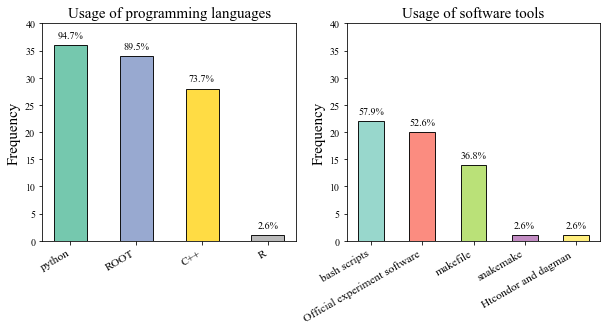

In [34]:
col = plt.cm.Set2(np.linspace(0,1,len(df_1)))
bar_width = 0.5
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))


ax.set_title("Usage of programming languages", fontsize=fontsize)
ax.set_ylabel('Frequency', fontsize=fontsize)
y_pos = np.arange(1, len(df_1)+1)
ax.bar(y_pos, tuple(df_1['response']), bar_width, alpha=0.9, align='center', 
       color=col, edgecolor='k', linewidth=1)
ax.set_xticks(y_pos)
ax.set_xticklabels(tuple(df_1.index), fontsize=11.5)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_ylim([0,40])

for p in ax.patches:
    proc = p.get_height()*100.0/38.0
    ax.annotate("%.1f" % proc+"%", (p.get_x() + p.get_width() / 2., p.get_height()), \
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    

col = plt.cm.Set3(np.linspace(0,1,len(df_2)))
ax2.set_title("Usage of software tools", fontsize=fontsize)
ax2.set_ylabel('Frequency', fontsize=fontsize)
y_pos = np.arange(1, len(df_2)+1)
ax2.bar(y_pos, tuple(df_2['response']), bar_width, alpha=0.9, align='center', 
       color=col, edgecolor='k', linewidth=1)
ax2.set_xticks(y_pos)
ax2.set_xticklabels(tuple(df_2.index), fontsize=11.5)
plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')
ax2.set_ylim([0,40])

for p in ax2.patches:
    proc = p.get_height()*100.0/38.0
    ax2.annotate("%.1f" % proc+"%", (p.get_x() + p.get_width() / 2., p.get_height()), \
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

fig.tight_layout()
fig.savefig('software.pdf', dpi=100)

# Physics papers per year

Time: June 2018

Source: https://indico.cern.ch/event/726320/contributions/2988536/attachments/1658549/2656378/2018-05-30-apearce-LHCC-LHCb-status-report.pdf

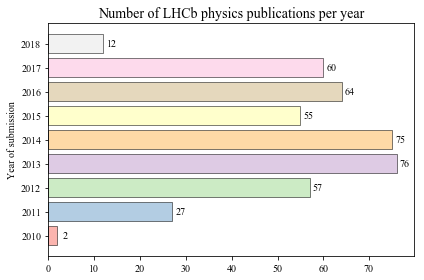

In [13]:
a = [2, 27, 57, 76, 75, 55, 64, 60, 12]
b = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
col = plt.cm.Pastel1(np.linspace(0,1,9))


fig_ = plt.figure()
ax_ = fig_.gca()
ax_.set_title('Number of LHCb physics publications per year', fontsize=14)

rects = ax_.barh(np.arange(len(a)), a, color=col, edgecolor='k', linewidth=0.5)
ax_.set_yticks(np.arange(len(a)))
ax_.set_yticklabels(b, fontsize=10)
# ax_.invert_yaxis()  # labels read top-to-bottom
ax_.set_ylabel('Year of submission')

for rect in rects:
        width = rect.get_width()
        plt.text(rect.get_width()+1.8, rect.get_y()+0.5*rect.get_height(),'%d'% int(width), ha='center', va='center')

fig_.tight_layout()
plt.show()
fig_.savefig('papers.pdf', dpi=100)